# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from google.colab import drive

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [5]:
drive.mount('/content/drive')
dataset_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/synthetic_beverage_sales_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
print(dataset_df.head())

  Order_ID Customer_ID Customer_Type             Product     Category  \
0     ORD1     CUS1496           B2B          Vio Wasser        Water   
1     ORD1     CUS1496           B2B               Evian        Water   
2     ORD1     CUS1496           B2B              Sprite  Soft Drinks   
3     ORD1     CUS1496           B2B  Rauch Multivitamin       Juices   
4     ORD1     CUS1496           B2B        Gerolsteiner        Water   

   Unit_Price  Quantity  Discount  Total_Price             Region  Order_Date  
0        1.66        53      0.10        79.18  Baden-Württemberg  2023-08-23  
1        1.56        90      0.10       126.36  Baden-Württemberg  2023-08-23  
2        1.17        73      0.05        81.14  Baden-Württemberg  2023-08-23  
3        3.22        59      0.10       170.98  Baden-Württemberg  2023-08-23  
4        0.87        35      0.10        27.40  Baden-Württemberg  2023-08-23  


In [468]:
print(dataset_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Order_ID       object 
 1   Customer_ID    object 
 2   Customer_Type  object 
 3   Product        object 
 4   Category       object 
 5   Unit_Price     float64
 6   Quantity       int64  
 7   Discount       float64
 8   Total_Price    float64
 9   Region         object 
 10  Order_Date     object 
dtypes: float64(3), int64(1), object(7)
memory usage: 755.3+ MB
None


In [277]:
print("Beverage Details")
display(dataset_df.describe())

Beverage Details


,Unit_Price,Quantity,Discount,Total_Price
count,8.999910e+06,8.999910e+06,8.999910e+06,8.999910e+06
mean,5.818037e+00,2.313813e+01,2.972879e-02,1.307437e+02
std,1.470050e+01,2.689321e+01,4.479841e-02,5.096947e+02
min,3.200000e-01,1.000000e+00,0.000000e+00,3.000000e-01
25%,1.050000e+00,6.000000e+00,0.000000e+00,8.400000e+00
50%,1.750000e+00,1.100000e+01,0.000000e+00,2.114000e+01
75%,3.210000e+00,3.000000e+01,5.000000e-02,6.949000e+01
max,1.695300e+02,1.000000e+02,1.500000e-01,1.429530e+04


<Figure size 1200x600 with 0 Axes>

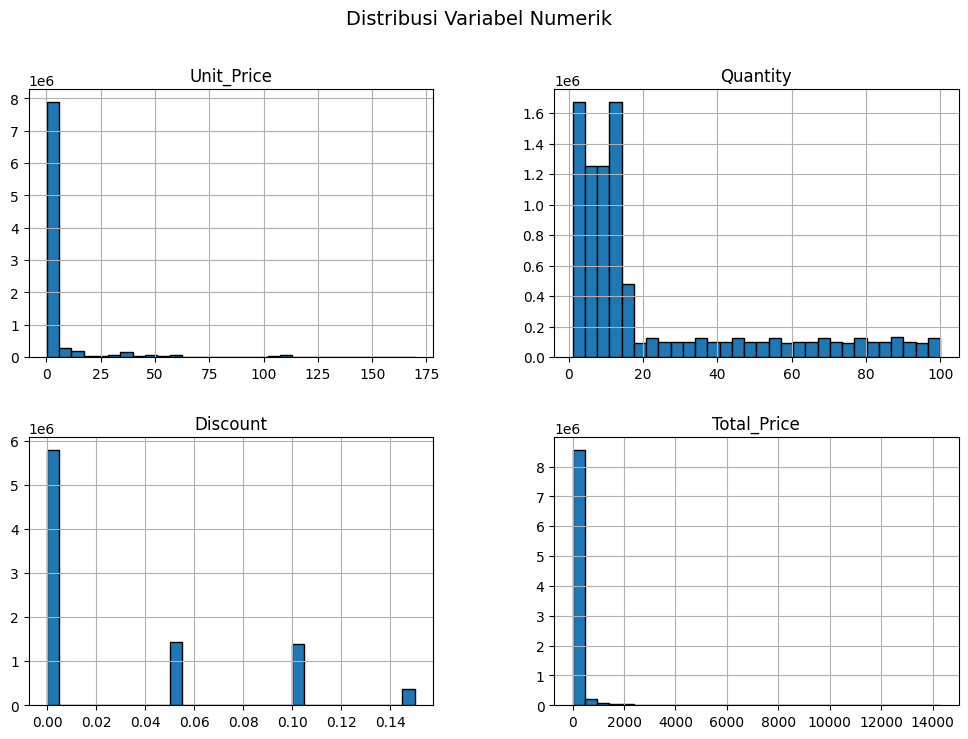

In [66]:
numer = dataset_df.select_dtypes(include=['number']).columns

plt.figure(figsize=(12, 6))
dataset_df[numer].hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle('Distribusi Variabel Numerik', fontsize=14)
plt.show()

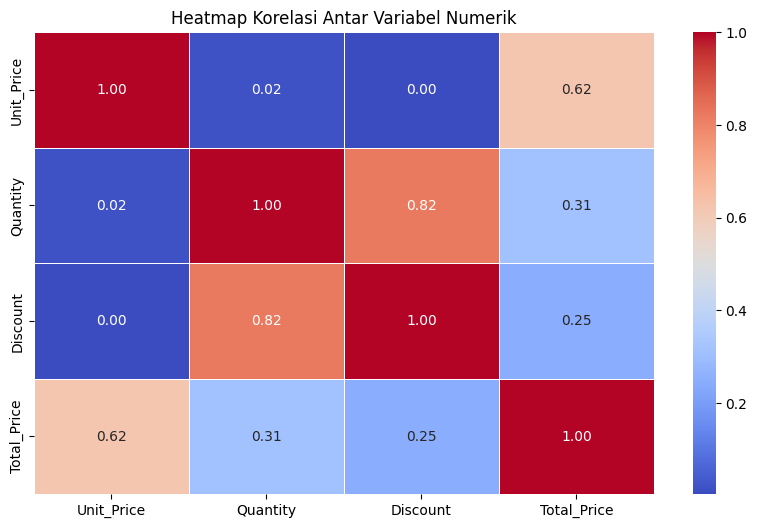

In [67]:
plt.figure(figsize=(10, 6))
sns.heatmap(dataset_df[numer].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

In [68]:
print(dataset_df.isnull().sum())
print(dataset_df.duplicated().sum())

Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64
0


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [148]:
dataset_sample = dataset_df.sample(n=10000, random_state=42)
numerical_cols = ["Unit_Price", "Quantity", "Discount", "Total_Price"]
print(dataset_df.head())

  Order_ID Customer_ID Customer_Type             Product     Category  \
0     ORD1     CUS1496           B2B          Vio Wasser        Water   
1     ORD1     CUS1496           B2B               Evian        Water   
2     ORD1     CUS1496           B2B              Sprite  Soft Drinks   
3     ORD1     CUS1496           B2B  Rauch Multivitamin       Juices   
4     ORD1     CUS1496           B2B        Gerolsteiner        Water   

   Unit_Price  Quantity  Discount  Total_Price             Region  Order_Date  
0        1.66        53      0.10        79.18  Baden-Württemberg  2023-08-23  
1        1.56        90      0.10       126.36  Baden-Württemberg  2023-08-23  
2        1.17        73      0.05        81.14  Baden-Württemberg  2023-08-23  
3        3.22        59      0.10       170.98  Baden-Württemberg  2023-08-23  
4        0.87        35      0.10        27.40  Baden-Württemberg  2023-08-23  


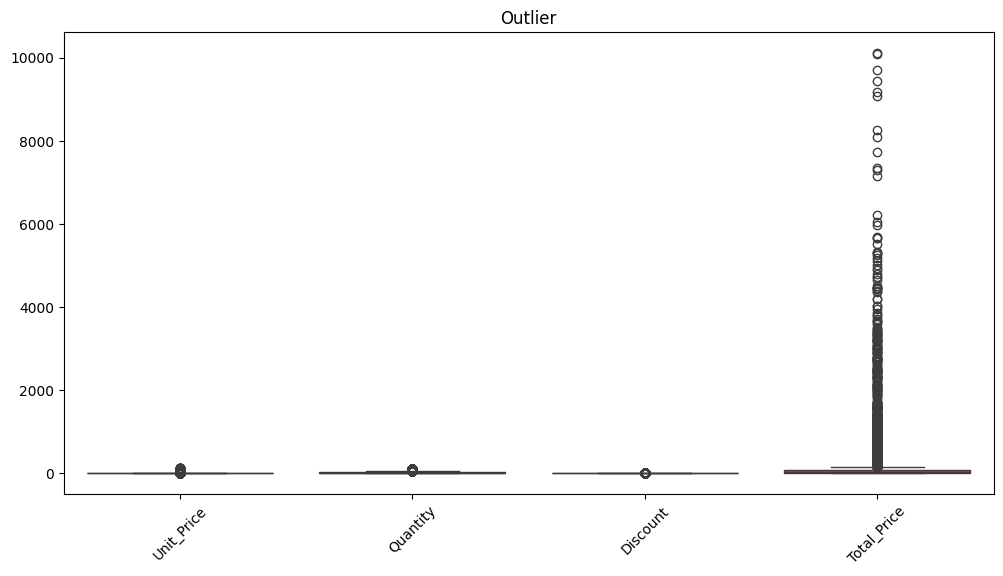

In [130]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset_sample[numerical_cols])
plt.xticks(rotation=45)
plt.title("Outlier")
plt.show()

In [131]:
scaler = MinMaxScaler()
dataset_sample[numerical_cols] = scaler.fit_transform(dataset_sample[numerical_cols])

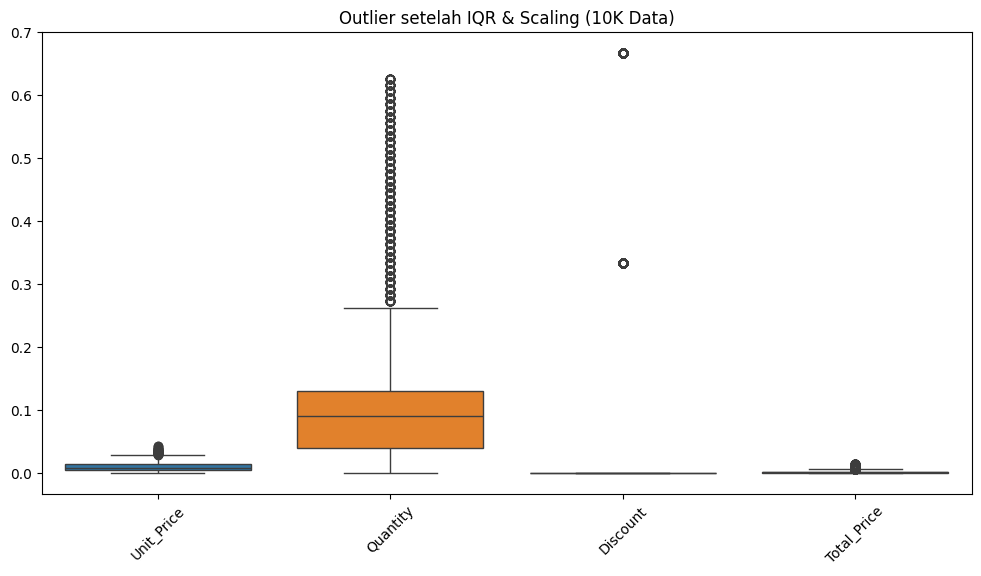

In [136]:
Q1 = dataset_sample[numerical_cols].quantile(0.25)
Q3 = dataset_sample[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

dataset_sample_filtered = dataset_sample[~((dataset_sample[numerical_cols] < lower_bound) |
                                  (dataset_sample[numerical_cols] > upper_bound)).any(axis=1)]
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset_sample_filtered[numerical_cols])
plt.xticks(rotation=45)
plt.title("Outlier setelah IQR & Scaling (10K Data)")
plt.show()

In [149]:
dataset_sample_original = dataset_sample.copy()

encoder = LabelEncoder()
encoder.fit(dataset_sample_original["Category"])

category_mapping = dict(zip(dataset_sample_original["Category"].unique(), encoder.transform(dataset_sample_original["Category"].unique())))
inverse_category_mapping = {v: k for k, v in category_mapping.items()}

dataset_sample["Category"] = encoder.transform(dataset_sample["Category"])

print(dataset_sample.head())

           Order_ID Customer_ID Customer_Type         Product  Category  \
4990465  ORD1663596     CUS5073           B2B  Hohes C Orange         1   
5995542  ORD1999010      CUS141           B2B      Fritz-Kola         2   
1044351   ORD347756      CUS562           B2B          Merlot         0   
1802181   ORD600360     CUS7718           B2B  Moët & Chandon         0   
6900691  ORD2300591     CUS6160           B2C   Granini Apple         1   

         Unit_Price  Quantity  Discount  Total_Price         Region  \
4990465        1.87        74      0.10       124.54  Niedersachsen   
5995542        1.87        18      0.05        31.98         Bremen   
1044351       12.04        71      0.15       726.61      Thüringen   
1802181       64.91        91      0.10      5316.13        Hamburg   
6900691        1.64         4      0.00         6.56        Sachsen   

         Order_Date  
4990465  2023-11-29  
5995542  2021-05-13  
1044351  2021-04-21  
1802181  2021-08-23  
6900691  202

In [138]:
dataset_sample_filtered = dataset_sample[~((dataset_sample[numerical_cols] < lower_bound) |
                                  (dataset_sample[numerical_cols] > upper_bound)).any(axis=1)]
dataset_sample_filtered["Category"] = dataset_sample_filtered["Category"].astype(int)
numerical_features = dataset_sample_filtered.select_dtypes(include=['number']).columns
dataset_kmeans = dataset_sample_filtered[numerical_features]

print(dataset_kmeans.dtypes)

Category         int64
Unit_Price     float64
Quantity       float64
Discount       float64
Total_Price    float64
dtype: object


<ipython-input-138-1cdedf221ead>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_sample_filtered["Category"] = dataset_sample_filtered["Category"].astype(int)


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [142]:
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
dataset_kmeans['Cluster'] = kmeans.fit_predict(dataset_kmeans)
labels = kmeans.fit_predict(dataset_kmeans)

print(dataset_kmeans.head())

         Category  Unit_Price  Quantity  Discount  Total_Price  Cluster
5995542         2    0.011128  0.171717  0.333333     0.003128        0
6900691         1    0.009466  0.030303  0.000000     0.000614        1
7916353         2    0.010189  0.040404  0.000000     0.000826        0
2410826         1    0.010622  0.141414  0.000000     0.002636        1
5008990         3    0.004697  0.050505  0.333333     0.000518        2


<ipython-input-142-da1f037d8683>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_kmeans['Cluster'] = kmeans.fit_predict(dataset_kmeans)


Insight:
* Dataset telah berhasil dikelompokkan ke dalam 3 cluster, menunjukkan pola pembelian yang berbeda berdasarkan fitur yang digunakan, yang dapat digunakan untuk strategi marketing untuk ke depannya.

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

Silhouette Score menggunakan K-Means: 0.7777


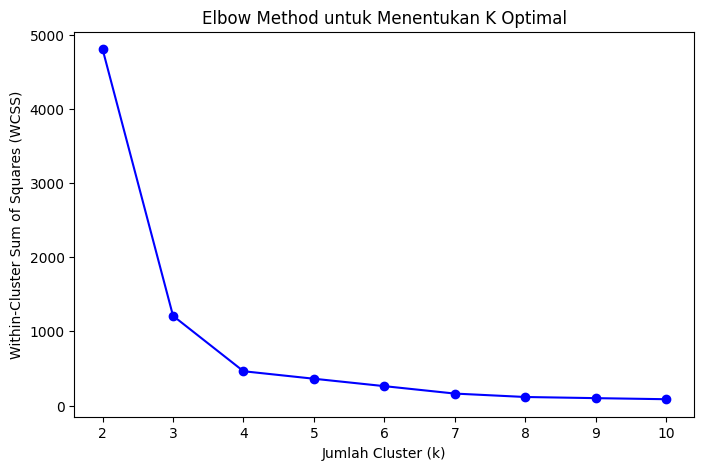

In [143]:
wcss = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(dataset_kmeans)
    wcss.append(kmeans.inertia_)

before_feature = silhouette_score(dataset_kmeans, labels)
print(f"Silhouette Score menggunakan K-Means: {before_feature:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='-', color='b')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method untuk Menentukan K Optimal")
plt.show()

Insight:
* Grafik menunjukkan bahwa titik elbow berada di k = 3, di mana penurunan Within-Cluster Sum of Squares (WCSS) mulai melambat. Ini menunjukkan bahwa 3 cluster adalah jumlah optimal untuk model K-Means dalam dataset ini, serta silhouette score menunjukkan angka yang cukup baik yaitu 0.51, namun masih perlu peningkatan.

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [144]:
selected_features = ["Unit_Price", "Discount", "Category"]

dataset_selected = dataset_kmeans[selected_features].copy()

# Clustering ulang
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(dataset_selected)

silhouette_avg = silhouette_score(dataset_selected, labels)
print(f"Silhouette Score sebelum feature selection: {before_feature:.4f}")
print(f"Silhouette Score setelah feature selection: {silhouette_avg:.4f}")


Silhouette Score sebelum feature selection: 0.7777
Silhouette Score setelah feature selection: 0.7209


Insight:
* Dapat ditunjukkan bahwa silhouette score setelah feature selection mengalami penurunan yang semula 0.77 menjadi 0.72

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

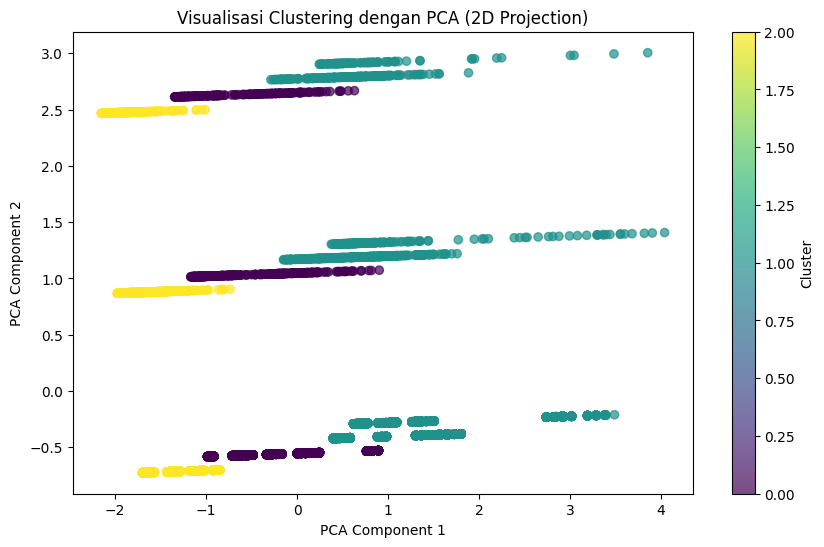

In [145]:
scaler = StandardScaler()
dataset_selected_scaled = scaler.fit_transform(dataset_selected)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(dataset_selected_scaled)

dataset_selected['PCA1'] = pca_result[:, 0]
dataset_selected['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(dataset_selected['PCA1'], dataset_selected['PCA2'], c=labels, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label="Cluster")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Visualisasi Clustering dengan PCA (2D Projection)")
plt.show()

Insight:
* Dilakukan scalling menggunakan Standard Scaler, karena dengan adanya Standard Scaler mengubah distribusi menjadi mean = 0 dan std = 1, agar nantinya PCA bisa menangkap informasi tersebut lebih stabil
* Hasil dari grafik tersebut juga menghasil warna yang berbeda mewakilkan cluster yang berbeda, ditribusi yang tampak teratur (dengan adanya garis horizontal) dan punya dampak besar dalam membedakan masing-masing cluster.

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [146]:
dataset_selected["Cluster"] = labels
print(dataset_selected.head())

         Unit_Price  Discount  Category      PCA1      PCA2  Cluster
5995542    0.011128  0.333333         2 -0.270456  1.040086        0
6900691    0.009466  0.000000         1  0.433919 -0.420048        1
7916353    0.010189  0.000000         2 -0.166095 -0.559817        0
2410826    0.010622  0.000000         1  0.541914 -0.416996        1
5008990    0.004697  0.333333         3 -1.538688  0.881431        2


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [150]:
dataset_selected_scaled_only = dataset_selected[selected_features]
dataset_selected_scaled_only = scaler.fit_transform(dataset_selected_scaled_only)

dataset_selected_original = scaler.inverse_transform(dataset_selected_scaled_only)
dataset_selected_original = pd.DataFrame(dataset_selected_original, columns=selected_features)

dataset_selected_original["Category"] = dataset_selected_original["Category"].astype(int)

dataset_selected_original["Category"] = dataset_selected_original["Category"].map(inverse_category_mapping)
print(dataset_selected_original.head())

   Unit_Price  Discount     Category
0    0.011128  0.333333  Soft Drinks
1    0.009466  0.000000       Juices
2    0.010189  0.000000  Soft Drinks
3    0.010622  0.000000       Juices
4    0.004697  0.333333        Water


Insight:
* Melakukan inverse data pada Discount, Unit Price dan Category kembali ke bentuk aslinya
* Dengan menggunakan metode typecast dan mapping dari int atau angka (saat proses encoding pada Category) dan merubah kembali ke bentuk kalimat

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [151]:
numeric_cols = dataset_selected.select_dtypes(include=["number"]).columns

cluster_summary = dataset_selected.groupby("Cluster", as_index=False)[numeric_cols].mean()
categorical_cols = ["Category"]
cluster_summary_cat = (
    dataset_selected.groupby("Cluster", as_index=False)[categorical_cols]
    .agg(lambda x: x.mode().iloc[0])
)

cluster_summary_cat["Category"] = cluster_summary_cat["Category"].map(inverse_category_mapping)
final_cluster_summary = cluster_summary.merge(cluster_summary_cat, on="Cluster", how="left")

final_cluster_summary = final_cluster_summary.drop(columns=["Category_x"], errors="ignore")
final_cluster_summary.rename(columns={"Category_y": "Category"}, inplace=True)
display(final_cluster_summary)

,Unit_Price,Discount,PCA1,PCA2,Cluster,Category
0,0.008963,0.112340,-0.345317,-0.024690,0.0,Soft Drinks
1,0.015562,0.105890,1.176737,0.153258,1.0,Juices
2,0.004459,0.106655,-1.430223,-0.205501,2.0,Water


Tulis hasil interpretasinya di sini.
# Cluster 0
*  Rata-rata Unit Price: 0.0089
* Rata-rata Discount: 0.1123
* Kategori Produk Dominan: Soft Drinks
* Analisis: Cluster ini terdiri dari pelanggan yang membeli Soft Drinks dengan harga unit paling rendah dibandingkan cluster lainnya. Mereka mendapatkan diskon tertinggi (0.1123) dibandingkan cluster lain, yang mengindikasikan bahwa produk dalam kategori ini lebih sering diberikan promosi. Nilai PCA 1 negatif menunjukkan bahwa pola pembelian dalam cluster ini memiliki karakteristik yang berbeda dari cluster lainnya, kemungkinan besar lebih terkait dengan pembelian dalam jumlah besar atau produk dengan margin keuntungan lebih kecil.
# Cluster 1
* Rata-rata Unit Price: 0.0155
* Rata-rata Discount: 0.1059
* Kategori Produk Dominan: Juices
* Analisis: Pelanggan dalam cluster ini membeli Juices dengan harga yang lebih tinggi dibandingkan Cluster 0, namun tetap mendapatkan diskon. Nilai PCA 1 positif (1.1767) menunjukkan bahwa pelanggan dalam cluster ini memiliki pola pembelian yang lebih berbeda dari Cluster 0, kemungkinan lebih memilih produk dengan harga lebih tinggi atau dari kategori yang lebih premium. Hal ini bisa menunjukkan bahwa produk dalam kategori Juices memiliki daya tarik yang lebih eksklusif atau lebih banyak dipilih oleh pelanggan dengan preferensi tertentu.
# Cluster 2
* Rata-rata Unit Price: 0.0044
* Rata-rata Discount: 0.1066
* Kategori Produk Dominan: Water
* Analisis: Pelanggan dalam cluster ini lebih banyak membeli Water, dengan harga unit paling rendah (0.0044) dibandingkan semua cluster lainnya. Meskipun diskonnya masih cukup tinggi (0.1066), nilai PCA 1 negatif (-1.4302) menunjukkan bahwa pola pembelian pelanggan dalam cluster ini memiliki karakteristik yang sangat berbeda dari Cluster 1. Hal ini bisa mengindikasikan bahwa pelanggan dalam cluster ini lebih memilih produk dengan harga sangat ekonomis, kemungkinan besar untuk keperluan sehari-hari atau pembelian dalam jumlah besar.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [152]:
dataset_selected.to_csv("dataset_clustering.csv", index=False)

print("Dataset berhasil diekspor sebagai 'dataset_clustering.csv'")

Dataset berhasil diekspor sebagai 'dataset_clustering.csv'
